In [1]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install scikit-learn

In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install kaggle

     ---------------------------------------- 0.0/82.7 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/82.7 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/82.7 kB ? eta -:--:--
     --------- ---------------------------- 20.5/82.7 kB 108.9 kB/s eta 0:00:01
     -------------- ----------------------- 30.7/82.7 kB 145.2 kB/s eta 0:00:01
     ------------------ ------------------- 41.0/82.7 kB 164.3 kB/s eta 0:00:01
     -------------------------------- ----- 71.7/82.7 kB 245.8 kB/s eta 0:00:01
     -------------------------------------- 82.7/82.7 kB 272.4 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/163.0 kB ? eta -:--:--
   ------------------------------------- -- 153.6/163.0 k

: 

In [43]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns


In [44]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [45]:
data.shape

(284807, 31)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [47]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Vemos que no existen valores nulos en el dataset, ahora veremos si existen datos duplicados


In [48]:
data.duplicated().sum()

np.int64(1081)

In [49]:
duplicates = data[data.duplicated(keep='first')]
duplicates.shape

(1081, 31)

In [50]:
duplicates.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
221,145.0,-2.420413,1.947885,0.553646,0.983069,-0.281518,2.408958,-1.401613,-0.188299,0.675878,...,1.213826,-1.238620,0.006927,-1.724222,0.239603,-0.313703,-0.188281,0.119831,6.00,0
223,145.0,-2.419486,1.949346,0.552998,0.982710,-0.284815,2.411200,-1.398537,-0.188922,0.675695,...,1.213390,-1.238354,0.007191,-1.724175,0.239721,-0.313607,-0.187431,0.119472,6.74,0
1178,919.0,0.904289,-0.538055,0.396058,0.500680,-0.864473,-0.657199,0.027231,-0.029473,0.265447,...,-0.099460,-0.597579,-0.048666,0.551824,0.182934,0.402176,-0.081357,0.027252,158.00,0
1180,919.0,1.207596,-0.036860,0.572104,0.373148,-0.709633,-0.713698,-0.181105,0.011277,0.283940,...,-0.194591,-0.514717,0.089714,0.543768,0.240581,0.418921,-0.051693,-0.000085,1.00,0
1382,1074.0,-2.248488,-0.195670,0.026949,-0.525780,-0.238759,-0.033359,0.162196,0.928520,-0.424215,...,-0.032208,-0.745757,-0.243193,-0.821633,-0.030402,0.335838,-0.286998,-0.243768,158.00,0


Existen solo 1081 filas duplicadas, lo que representa el 0,38% de la base de datos luego analizando las filas duplicadas vemos que puede tratarse de una misma persona que ha hecho varias transacciones, esto indica que no tiene mucha relevancia en el dataset para hacerle un tratamiento.

In [51]:
data_clean = data.drop_duplicates()
data_clean.shape

(283726, 31)

#**Análisis Exploratorio (EDA)**

In [52]:
# separating the data for analysis
normal = data_clean[data.Class == 0]
fraud = data_clean[data.Class == 1]
print(normal.shape)
print(fraud.shape)

(283253, 31)
(473, 31)


C:\Users\Juan\AppData\Local\Temp\ipykernel_10252\3167583431.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  normal = data_clean[data.Class == 0]
C:\Users\Juan\AppData\Local\Temp\ipykernel_10252\3167583431.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fraud = data_clean[data.Class == 1]


C:\Users\Juan\AppData\Local\Temp\ipykernel_10252\513497781.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['Class'], sort = True)


Text(0, 0.5, 'Frequency')

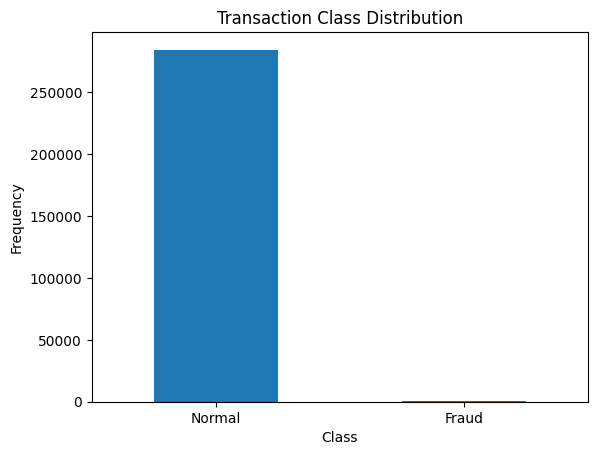

In [53]:
LABELS = ["Normal", "Fraud"]
count_classes = pd.value_counts(data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

Vemos que hay un desbalance en el dataset con solo 492(0,17%) casos de fraude contra 284315 transacciones normales.

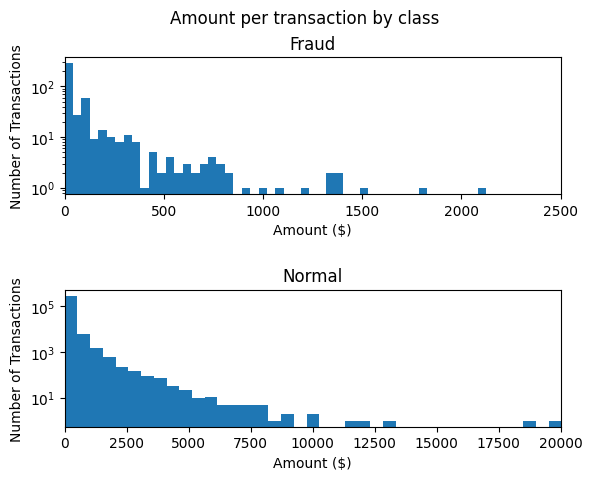

In [54]:


# Create the subplots without sharing the x-axis
f, (ax1, ax2) = plt.subplots(2, 1, sharex=False)
f.suptitle('Amount per transaction by class')
bins = 50

# Plot the histograms
ax1.hist(fraud.Amount, bins=bins)
ax1.set_title('Fraud')
ax1.set_xlim(0, 2500)  # Set x-axis limits for ax1

ax2.hist(normal.Amount, bins=bins)
ax2.set_title('Normal')
ax2.set_xlim(0, 20000)  # Set x-axis limits for ax2

# Set the labels and scale
ax1.set_xlabel('Amount ($)')
ax1.set_ylabel('Number of Transactions')
ax1.set_yscale('log')  # Apply log scale to y-axis for ax1 if needed

ax2.set_xlabel('Amount ($)')
ax2.set_ylabel('Number of Transactions')
ax2.set_yscale('log')  # Apply log scale to y-axis for ax2 if needed
f.subplots_adjust(hspace=0.7)  # Adjust the spacing between subplots
# Show the plot
plt.show()


Vemos que la mayoria de las transacciones fraudulentas estan entre 0-850 dólares, es decir son montos relativamente pequeños. En el caso de las transacciones normales están mayormente distribuidas entre 0-7500 dólares

In [55]:
# Revisamos los datos estadísticos en cuanto a la columna Amount, que es el monto de cada transacción
normal.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [56]:
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Haciendo una comparación entre las transacciones, notamos que el promedio de las transacciones normales(mean) es 88.29 mientras que de las fraudulentas es 122.21, es decir que las transacciones de menor monto son mucho mayores en las transacciones normales, esto lo corroboramos con el dato de la desviación estándar(std) que es menor en las transacciones normales(250.1 vs 256.68 en las fraudulentas) lo que significa que la mayoría de las transacciones normales estan cercanas al monto promedio.

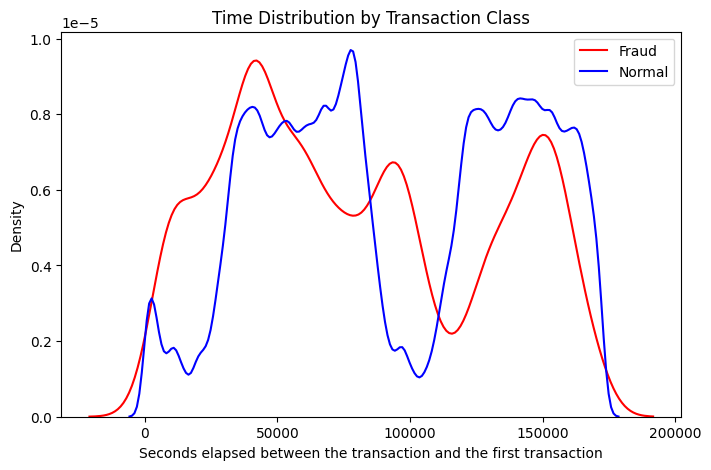

In [57]:


plt.figure(figsize=(8, 5))

# Plot the KDE plots for both fraud and normal data
sns.kdeplot(fraud['Time'], label='Fraud', bw_adjust=0.5, color='red')
sns.kdeplot(normal['Time'], label='Normal', bw_adjust=0.5, color='blue')

# Set the labels and title
plt.xlabel('Seconds elapsed between the transaction and the first transaction')
plt.title('Time Distribution by Transaction Class')

# Add a legend
plt.legend()

# Show the plot
plt.show()


Vemos que respecto al tiempo transcurrido desde la primera transacción del dataset, no vemos un patrón definido o alguna correlación entre las transacciones normales y las fraudulentas.

Creamos un mapa de correlación


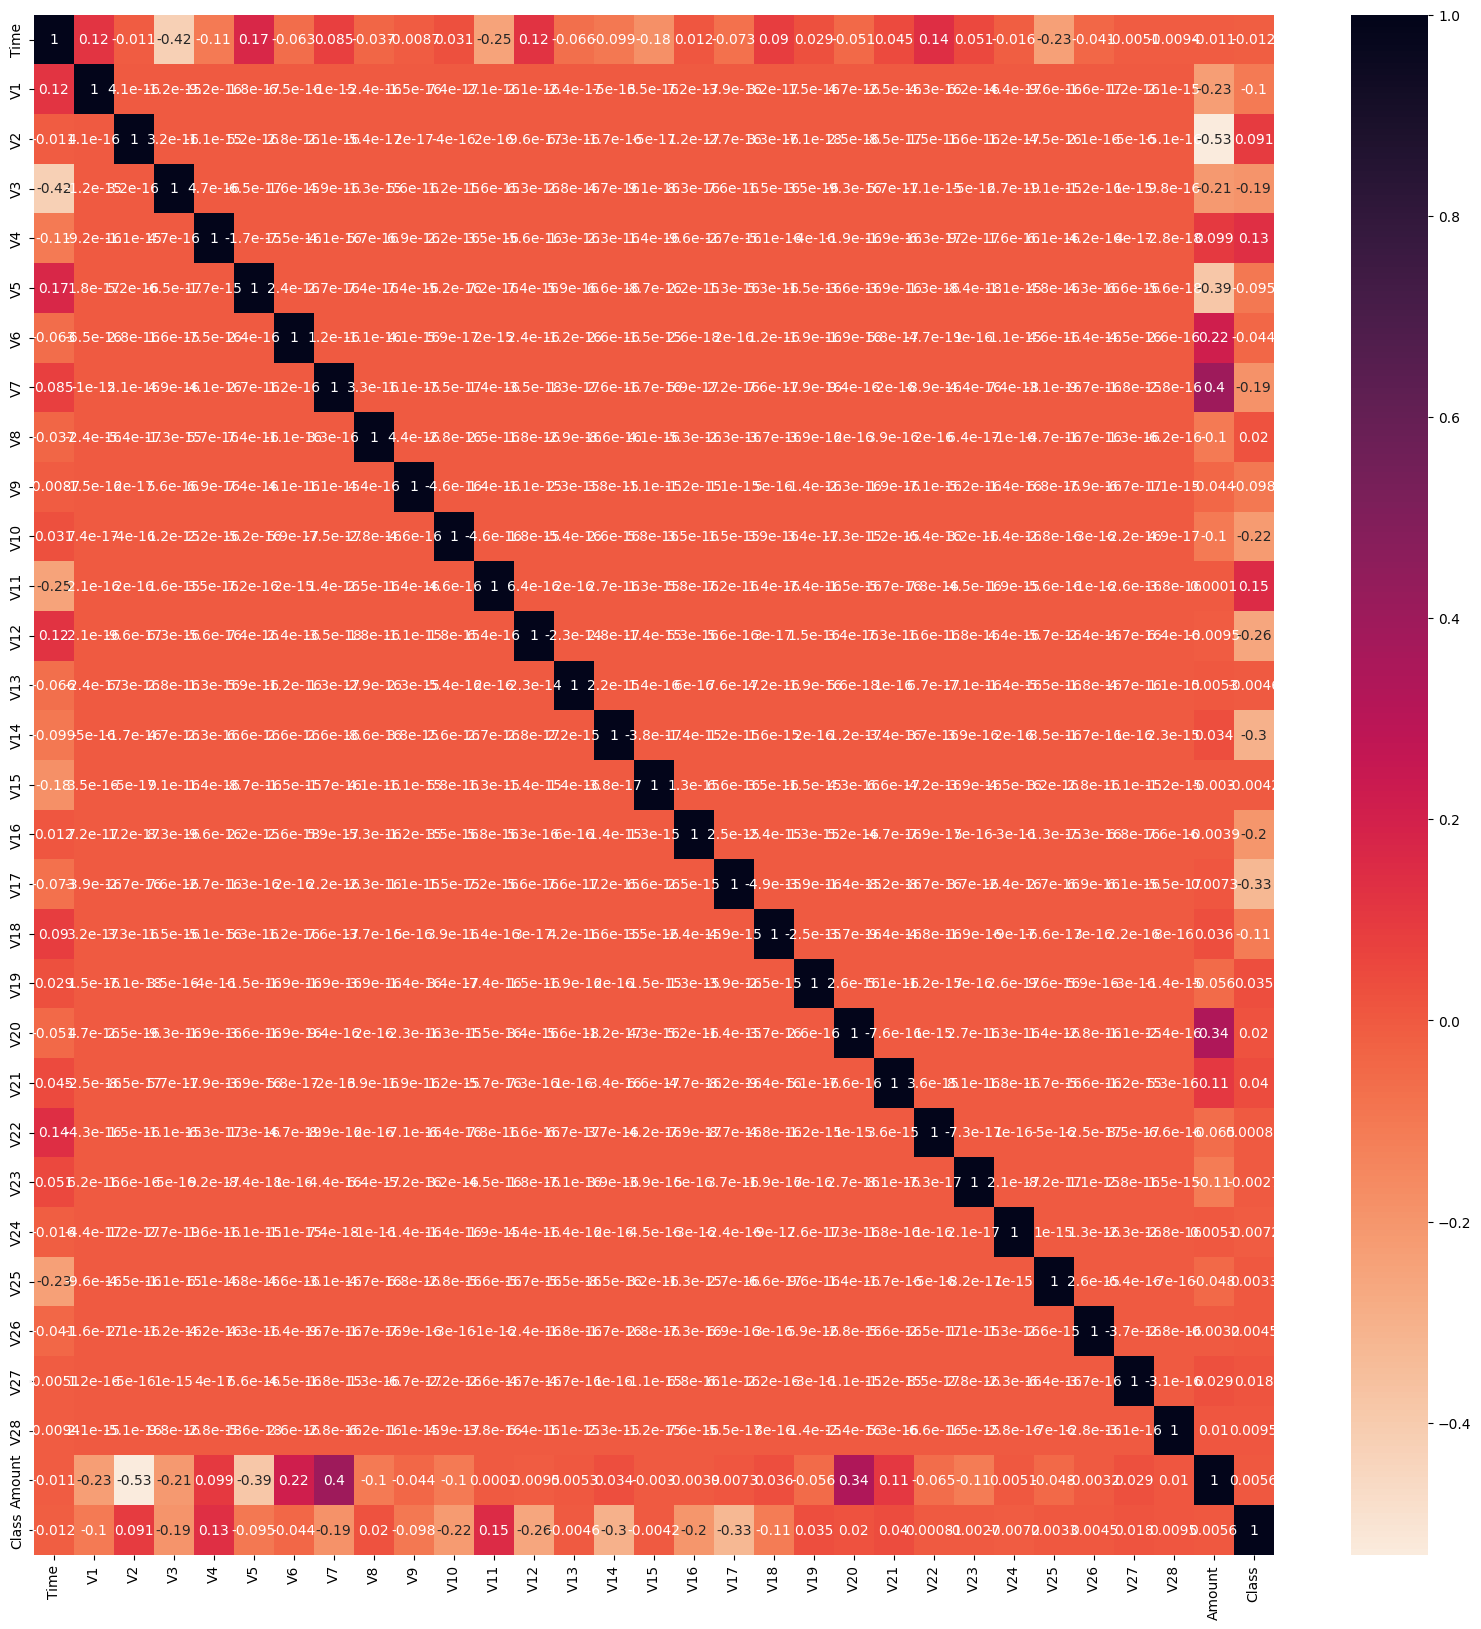

In [58]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="rocket_r")

El objetivo de un mapa de correlación es determinar que grado de dependencia existe entre variables, osea cuan similares son en su comportamiento, en nuestro dataset nos enfocamos en las columnas Time, Amount y Class, ya que las demas (v1-v28) se refieren a datos personales de los clientes.  Cuanto más cerca esta de 1 significa que las variables tienen un comportamiento muy parecido, en nuestro mapa no observamos eso, ya que la correlación más alta es 0.4 lo que indica que las variables no se relacionan entre sí.

# **Entrenando el modelo**

In [59]:
#Create independent and Dependent Features
columns = data.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting
target = "Class"
# Define a random state
state = np.random.RandomState(42)
X = data_clean[columns]
Y = data_clean[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(283726, 30)
(283726,)


In [60]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [61]:
X = X.drop(['Time'], axis=1)
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [62]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [63]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X['Amount'] = sc.fit_transform(pd.DataFrame(X['Amount']))
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813


In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

## Predicción del modelo con la muestra total

In [66]:
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

for name, clf in classifier.items():
    print(f"\n=========={name}===========")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"\n Precision: {precision_score(y_test, y_pred)}")
    print(f"\n Recall: {recall_score(y_test, y_pred)}")
    print(f"\n F1 Score: {f1_score(y_test, y_pred)}")


==========Logistic Regression===========

 Accuracy: 0.9991541254009093

 Precision: 0.875

 Recall: 0.5444444444444444

 F1 Score: 0.6712328767123288

==========Decision Tree Classifier===========

 Accuracy: 0.9990836358509851

 Precision: 0.7159090909090909

 Recall: 0.7

 F1 Score: 0.7078651685393258


## Predicción del modelo con la muestra basada en operaciones fraudulentas


In [67]:
normal.shape

(283253, 31)

In [68]:
fraud.shape

(473, 31)

In [69]:
normal_sample = normal.sample(n=473)
normal_sample.shape

(473, 31)

In [70]:
#Creamos un dataframe con el mismo número de operaciones fraudulentas y normales
under_sample = pd.concat([normal_sample,fraud], ignore_index=True)
under_sample.Class.value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [71]:
X = under_sample.drop('Class', axis = 1)
y= under_sample['Class']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

for name, clf in classifier.items():
    print(f"\n=========={name}===========")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"\n Precision: {precision_score(y_test, y_pred)}")
    print(f"\n Recall: {recall_score(y_test, y_pred)}")
    print(f"\n F1 Score: {f1_score(y_test, y_pred)}")


==========Logistic Regression===========

 Accuracy: 0.9368421052631579

 Precision: 0.96875

 Recall: 0.9117647058823529

 F1 Score: 0.9393939393939394

==========Decision Tree Classifier===========

 Accuracy: 0.8894736842105263

 Precision: 0.8715596330275229

 Recall: 0.9313725490196079

 F1 Score: 0.9004739336492891


c:\Users\Juan\anaconda3\envs\fraud\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Predicción del modelo con la muestra basada en operaciones normales

In [73]:
X = data_clean.drop('Class', axis = 1)
y= data_clean['Class']

In [74]:
X.shape

(283726, 30)

In [75]:
y.shape

(283726,)

In [79]:
pip install -U imbalanced-learn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   ------ -------------------------------- 41.0/258.3 kB 326.8 kB/s eta 0:00:01
   ------------------ ------------------- 122.9/258.3 kB 798.9 kB/s eta 0:00:01
   ---------------------------------------- 258.3/258.3 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [80]:
from imblearn.over_sampling import SMOTE
X_res, y_res = SMOTE().fit_resample(X,y)
y_res.value_counts()

Class
0    283253
1    283253
Name: count, dtype: int64

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 42)
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

for name, clf in classifier.items():
    print(f"\n=========={name}===========")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"\n Precision: {precision_score(y_test, y_pred)}")
    print(f"\n Recall: {recall_score(y_test, y_pred)}")
    print(f"\n F1 Score: {f1_score(y_test, y_pred)}")


==========Logistic Regression===========


c:\Users\Juan\anaconda3\envs\fraud\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 Accuracy: 0.9716862897389278

 Precision: 0.982492757795491

 Recall: 0.9606784074315171

 F1 Score: 0.9714631369200114

==========Decision Tree Classifier===========

 Accuracy: 0.9986496266614887

 Precision: 0.9979794785297632

 Recall: 0.9993314449585672

 F1 Score: 0.9986550041756407
